In [1]:
# import torch
# from transformers import AutoTokenizer, AutoModelForSequenceClassification
# import pandas as pd

# df = pd.read_csv("../input/twitter-data-fromapi/label1.csv")
# # Load RoBERTa tokenizer and model
# tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")
# model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")

# # Define mapping of emotion labels to their names
# emotion_map = {
# 	0: 'anger',
# 	1: 'joy',
# 	2: 'optimism',
# 	3: 'sadness'
# }


# # # Define function to predict emotions for a list of tweets
# # def predict_emotions(tweets):
# # 	# Tokenize tweets
# # 	tokenized_tweets = tokenizer.batch_encode_plus(tweets, padding=True, truncation=True, return_tensors='pt')

# # 	# Pass tokenized tweets through RoBERTa model
# # 	logits = model(**tokenized_tweets)[0]

# # 	# Convert logits to probabilities using softmax
# # 	probabilities = torch.softmax(logits, dim=1)

# # 	# Get predicted emotion label for each tweet
# # 	predicted_labels = torch.argmax(probabilities, dim=1)

# # 	# Map predicted label indices to their emotion names
# # 	predicted_emotions = [emotion_map[label.item()] for label in predicted_labels]

# # 	return predicted_emotions


# # # Predict emotions for a list of tweets
# # tweets = df["clean_tweets"].tolist()
# # predicted_emotions = predict_emotions(tweets)
# # df["predicted_emotions"] = predicted_emotions
# # print(df["predicted_emotions"].value_counts())
# # df.to_csv("label3.csv")

In [2]:
!pip install transformers -q
!pip install GPUtil

ERROR: Could not find a version that satisfies the requirement GPUtil (from versions: none)
ERROR: No matching distribution found for GPUtil


In [3]:
import os
import numpy as np
import math
import time
from sklearn import preprocessing
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras import layers, regularizers
from tensorflow.keras.utils import plot_model
import pydot
import graphviz
import pandas as pd
import os

df = pd.read_csv("../input/twitter-data-fromapi/label3.csv", index_col=0)
df = df.head(1500)
df.head(5)

,Url,Lang,tweet,MediaUrl,clean_tweets,polarity,emotion,hate_speech
0,https://twitter.com/Militarylandnet/status/164...,en,📷Ukrainian President Zelensky visited Ukrainia...,https://pbs.twimg.com/media/FsUxOJBWIAoVEpj?fo...,ukrainian president zelensky visited ukrainian...,Neutral,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, ...",0
1,https://twitter.com/StupidSingapore/status/164...,en,youtube.com/watch?v=WBesSn…\n\nDespicable #Ukr...,https://pbs.twimg.com/media/FsUxt2_aAAAV1GS?fo...,youtubewatch v wbessn despicable tank take cov...,Negative,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0
2,https://twitter.com/findfreedom360/status/1640...,en,Drawing process update...📢\n\nLatest portrait ...,https://pbs.twimg.com/media/FsUw1ivaEAAEYC8?fo...,drawing process update latest portrait ukraine...,Positive,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ...",0
3,https://twitter.com/Orhan583441/status/1640769...,en,❗️A militant of the special forces unit Stepan...,https://pbs.twimg.com/media/FsUvmARWIAU4KX1?fo...,militant special force unit stepan kurilo liqu...,Positive,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.33,...",0
4,https://twitter.com/TrueMythocracy/status/1640...,en,@ShermanPotter51 @w85785410 So much has change...,https://pbs.twimg.com/media/FsUtsp1XgBYzWOq?fo...,much changed since feb 2022 anyone remember de...,Neutral,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':...",0


In [4]:
# from transformers import pipeline, RobertaTokenizerFast, TFRobertaForSequenceClassification

# # emotion = pipeline("sentiment-analysis",model="arpanghoshal/EmoRoBERTa")
# tokernzier = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
# model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")


In [5]:
le_senti = preprocessing.LabelEncoder()
# le_polarity.fit(df["polarity"])
df["polarity_le"] = le_senti.fit_transform(df["polarity"])
df.columns

Index(['Url', 'Lang', 'tweet', 'MediaUrl', 'clean_tweets', 'polarity',
       'emotion', 'hate_speech', 'polarity_le'],
      dtype='object')

In [6]:
# le_hate = preprocessing.LabelEncoder()
# df["hate_le"] = le_hate.fit_transform(df["hate_le"])
# df.columns

In [7]:
# def encode_dict(row):
#     le_emo = preprocessing.LabelEncoder()
#     encoded_dict = {}
#     for key, value in row.items():
#         encoded_dict[key] = le_emo.fit_transform([value])[0]
#     return encoded_dict

# df['le_emotions'] = df['emotion'].apply(encode_dict)
# df
import ast
def dict_to_df(s):
    d = ast.literal_eval(s)
    df = pd.DataFrame.from_dict(d, orient='index', columns=['value'])
    return df.transpose()

df_emotions = pd.concat([dict_to_df(s) for s in df['emotion'].values])
df_emotions.index = range(len(df_emotions))
print(len(df_emotions))
print(df_emotions.head(5))
print(df_emotions.columns)

1500
   Happy  Angry  Surprise  Sad  Fear
0    0.0    0.0      1.00  0.0  0.00
1    0.0    0.0      0.00  0.0  1.00
2    0.0    0.0      0.00  0.0  1.00
3    0.0    0.0      0.33  0.0  0.67
4    0.0    0.0      0.00  0.0  0.00
Index(['Happy', 'Angry', 'Surprise', 'Sad', 'Fear'], dtype='object')


In [8]:
# df_emotions.drop(columns=["index"], inplace=True, axis=1)
# # df_result = pd.concat([df, df_emotions], axis=1, join="inner",ignore_index=False)
df_result = pd.concat([df, df_emotions], join="inner", axis=1)
len(df_result)
df_result.drop(columns=["emotion"], inplace=True)
df_result['emotion'] = df_result.apply(lambda row: [row["Happy"], row['Angry'], row['Surprise'], row["Sad"],row['Fear']], axis=1)
# df_result.drop(columns=['Happy', 'Angry', 'Surprise', 'Sad', 'Fear'], inplace=True)
# df_result["hate_speech"].value_counts()

In [9]:
# .to_numpy()
np.array([np.array(x).astype(float) for x in df_result['emotion']])

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [10]:
from sklearn.model_selection import train_test_split

X = df_result['clean_tweets'].values
y = df_result[['polarity_le',"emotion","hate_speech"]].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1050,), (450,), (1050, 3), (450, 3))

In [11]:
y_train[:5,2]

array([0, 0, 0, 0, 0], dtype=object)

In [12]:
def get_tot_words(array):
    text = " ".join(array)
    return len(set(text.split()))
# train_samples
tot_words = get_tot_words(X_train)
tot_words

5212

In [13]:
vectorizer = TextVectorization(max_tokens = None, output_sequence_length = 105)
text_ds = tf.data.Dataset.from_tensor_slices(X_train).batch(128)
vectorizer.adapt(text_ds)

In [14]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

**TRANING MODEL**

In [15]:
glove_file = '../input/glove6b200d'
path_to_glove_file = os.path.join(glove_file, "glove.6B.200d.txt")
embeddings_index = {}
with open(path_to_glove_file, encoding = "utf-8") as f:
    for line in f:
        word, coefs = line.split(maxsplit = 1)
        coefs = np.fromstring(coefs, "f", sep = " ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [16]:
num_tokens = len(voc) + 2
embedding_dim = 200
hits = 0
misses = 0

# Prepare Embedding Matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be zeroes.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))


Converted 4215 words (999 misses)


In [17]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# class ConcatLayer(layers.Layer):
#     def __init__(self, **kwargs):
#         super(ConcatLayer, self).__init__(**kwargs)

#     def call(self, inputs):
#         return tf.concat(inputs, axis=-1)

# sentence_input = keras.Input(shape=(None,), dtype="int64", name='sentence_input')
# embedded_sentence = embedding_layer(sentence_input)
# x = layers.Bidirectional(layers.LSTM(len(X_train)//4, return_sequences=True, dropout=0.50, recurrent_dropout=0.25, name="LSTM_1"), name="bi_1")(embedded_sentence)
# x = ConcatLayer()([x, x])
# senti_branch = layers.TimeDistributed(layers.Dense(3, activation='softmax', name="senti_dense"), name='senti_output')(x)
# emot_branch = layers.TimeDistributed(layers.Dense(len(['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']), activation='sigmoid', name="emo_dense"), name='emo_out')(x)

# model = keras.Model(inputs=sentence_input, outputs=[senti_branch, emot_branch], name="model_1")


In [18]:
# from tensorflow.keras.preprocessing.text import Tokenizer

# # # Create a tokenizer object
# # tokenizer = Tokenizer()

# # # Fit the tokenizer on your training data
# # tokenizer.fit_on_texts(X_train)
# tokenizer = Tokenizer(num_words=vocab_size)
# vocab_size = len(tokenizer.word_index) + 1

# embedding_layer = layers.Embedding(
#     num_tokens,
#     embedding_dim,
#     embeddings_initializer = keras.initializers.Constant(embedding_matrix),
#     trainable = False)

In [19]:
embedding_layer = layers.Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer = keras.initializers.Constant(embedding_matrix),
    trainable = False)


In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# define the inputs and embedding layer
sentence_input = keras.Input(shape=(None,), dtype="int64", name='sentence_input')
# embedding_layer = layers.Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], trainable=False, name = 'embed_layer')
embedded_sentence = embedding_layer(sentence_input)

# define the model architecture
x = layers.Bidirectional(layers.LSTM(len(X_train)//2, return_sequences=True, dropout=0.50, recurrent_dropout=0.25, name="LSTM_1"), name="bi_1")(embedded_sentence)
senti_branch = layers.TimeDistributed(layers.Dense(3, activation='softmax', name="senti_dense"), name='senti_output')(x)
emot_branch = layers.TimeDistributed(layers.Dense(len(['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']), activation='sigmoid', name="emo_dense"), name='emo_out')(x)
hate_branch = layers.TimeDistributed(layers.Dense(2, activation = 'softmax', name = "hate_dense"), name = 'hate_out')(x)

# define the custom layer
class CustomLayer(keras.layers.Layer):
    def __init__(self, units=64, activation=None, **kwargs):
        super(CustomLayer, self).__init__(**kwargs)
        self.units = units
        self.activation = keras.activations.get(activation)

    def build(self, input_shape):
        self.kernel = self.add_weight(
            name='kernel',
            shape=(input_shape[-1], self.units),
            initializer='glorot_uniform',
            trainable=True)

        super(CustomLayer, self).build(input_shape)

    def call(self, inputs):
        output = keras.backend.dot(inputs, self.kernel)
        if self.activation is not None:
            output = self.activation(output)
        return output

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)


# use the custom layer on the symbolic input/output
custom_layer = CustomLayer(name="custom_layer")(embedded_sentence)

# define the model and compile it


In [21]:
model = keras.Model(inputs=sentence_input, outputs=[senti_branch, emot_branch, hate_branch, custom_layer], name="model_1")
# model.compile(optimizer='adam', loss=['categorical_crossentropy', 'binary_crossentropy', 'mse'])

# print the summary of the model
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sentence_input (InputLayer)    [(None, None)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, None, 200)    1043200     ['sentence_input[0][0]']         
                                                                                                  
 bi_1 (Bidirectional)           (None, None, 1050)   3049200     ['embedding[0][0]']              
                                                                                                  
 senti_output (TimeDistributed)  (None, None, 3)     3153        ['bi_1[0][0]']                   
                                                                                            

In [22]:
# sentence_input = keras.Input(shape = (None, ), dtype = "int64", name = 'sentence_input')
# embedded_sentence = embedding_layer(sentence_input)
# x = layers.Bidirectional(layers.LSTM(len(X_train)//2, return_sequences = True, dropout = 0.50, recurrent_dropout = 0.25, name = "LSTM_1"), name = "bi_1")(embedded_sentence)
# senti_branch = layers.TimeDistributed(layers.Dense(3, activation = 'softmax', name = "senti_dense"), name = 'senti_output')(x)
# emot_branch = layers.TimeDistributed(layers.Dense(len(['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']), activation = 'sigmoid', name = "emo_dense"), name = 'emo_out')(x)
# # hate_branch = layers.TimeDistributed(layers.Dense(len(), activation = 'softmax', name = "hate_dense"), name = 'hate_output')(x)

# model = keras.Model(inputs = sentence_input, outputs = [senti_branch, emot_branch], name = "model_1")
# model.summary()


In [23]:
# import torch
# import torch.nn as nn

# class BidirectionalLSTM(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, dropout):
#         super(BidirectionalLSTM, self).__init__()
#         self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, bidirectional=True, dropout=dropout, batch_first=True)

#     def forward(self, x):
#         out, _ = self.lstm(x)
#         return out

# class ConcatLayer(nn.Module):
#     def __init__(self):
#         super(ConcatLayer, self).__init__()

#     def forward(self, x):
#         return torch.cat(x, dim=-1)

# class Model(nn.Module):
#     def __init__(self, embedding_matrix, num_classes):
#         super(Model, self).__init__()
#         self.embedding_layer = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float))
#         self.lstm = BidirectionalLSTM(input_size=embedding_matrix.shape[1], hidden_size=embedding_matrix.shape[1]//2, num_layers=1, dropout=0.5)
#         self.concat_layer = ConcatLayer()
#         self.senti_branch = nn.Sequential(nn.Linear(embedding_matrix.shape[1], 3), nn.Softmax(dim=-1))
#         self.emot_branch = nn.Sequential(nn.Linear(embedding_matrix.shape[1]*2, len(['Happy', 'Angry', 'Surprise', 'Sad', 'Fear'])), nn.Sigmoid())

#     def forward(self, x):
#         embedded_sentence = self.embedding_layer(x)
#         lstm_out = self.lstm(embedded_sentence)
#         lstm_out_concat = self.concat_layer([lstm_out, lstm_out])
#         senti_out = self.senti_branch(lstm_out)
#         emot_out = self.emot_branch(lstm_out_concat)
#         return senti_out, emot_out
# model = Model(, (3,5))
# senti_out, emot_out = model(x_input)

In [24]:
# import torch.optim as optim

# criterion_senti = nn.BCELoss()
# criterion_emot = nn.BCELoss()
# optimizer = optim.Adam(model.parameters())

# # During training:
# senti_out, emot_out = model(input_tensor)
# loss_senti = criterion_senti(senti_out, y1_in)
# loss_emot = criterion_emot(emot_out, y2_in)
# loss = loss_senti + loss_emot
# optimizer.zero_grad()
# loss.backward()
# optimizer.step()


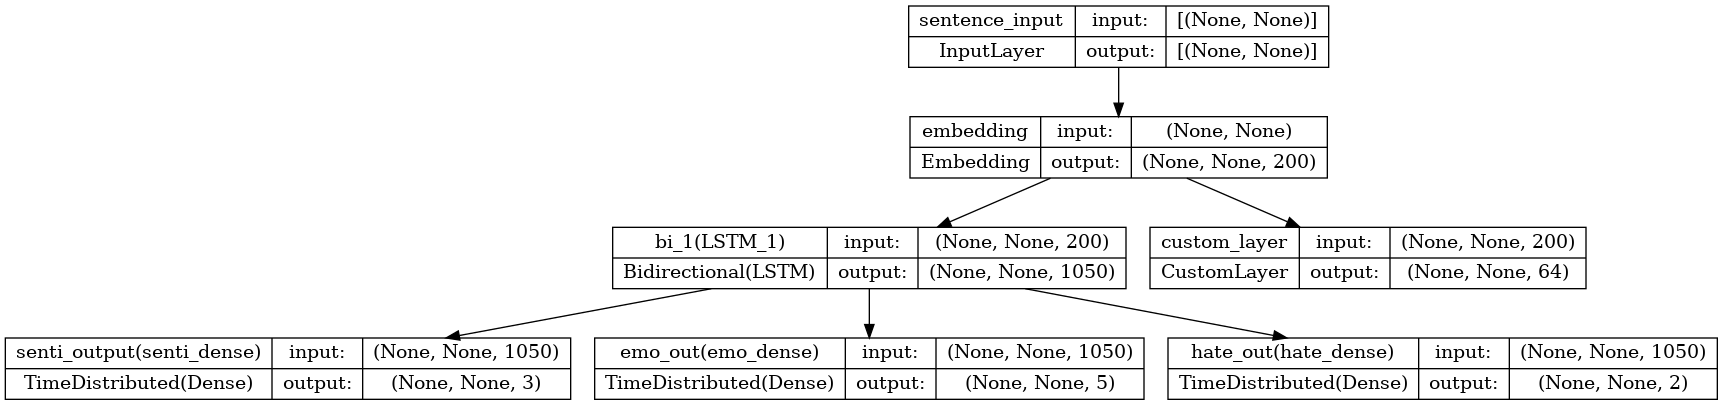

In [25]:
tf.keras.utils.plot_model(model, to_file = 'model_plot.png', show_shapes = True, show_layer_names = True)

In [26]:
# # opt = keras.optimizers.RMSprop(lr = 1e-3)
# model.compile(optimizer='adam',
#               loss = {'senti_output': 'binary_crossentropy', 'emo_out': 'binary_crossentropy'},
#               metrics=['accuracy']
#               )

In [27]:
y_train[:, 0]

array([0, 1, 1, ..., 2, 0, 0], dtype=object)

In [28]:
np.array([np.array(x).astype(float) for x in y_train[:, 1]])

array([[0.5, 0. , 0.5, 0. , 0. ],
       [0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       ...,
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0.5, 0.5, 0. ]])

In [29]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5383860583553478131
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16105865216
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9311628919504847259
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
xla_global_id: 416903419
]


In [30]:
# x_in = tf.convert_to_tensor(X_train)
# # x_in = np.expand_dims(x_in, axis=1)
# # X_train = X_train.astype(np.float32)
# # y_train = y_train.astype(np.float32)
# # x_in = tf.expand_dims(tf.expand_dims(x, axis=-1), axis=-1)
# # dims = [d for d in x_in.shape.as_list() if d is not None]
# # new_shape = tf.TensorShape(dims)
# # x_input = tf.reshape(x_in, new_shape)
# x_in = tf.constant(X_train)
# x_input = tf.expand_dims(np.array(x_in), axis=1)
# x_input = vectorizer(np.array([[s] for s in X_train]))
# y1_in = tf.one_hot(y_train[:, 0], depth=3)
# y1_in = tf.expand_dims(y1_in, axis=1)
# # y1_in = tf.repeat(y1_in, axis=1)  # repeat along the second axis
# y1_in = tf.reshape(y1_in, shape=(-1,1,  3))  # reshape to match x_input
# # y1_in = tf.reshape(y1_in, [9609, 105, 3])
# y2_in = tf.expand_dims(tf.convert_to_tensor(np.array([np.array(x).astype(float) for x in y_train[:, 1]])), axis=1)
# y3_in = tf.one_hot(y_train[:, 2], depth=2)
# y3_in = tf.expand_dims(y3_in, axis=1)
# y3_in = tf.repeat(y3_in, repeats=105, axis=1)  # repeat along the second axis
# y3_in = tf.reshape(y3_in, shape=(-1, 1, 2))  # reshape to match x_input


# x_input.shape, y1_in.shape,y2_in.shape, y3_in.shape

In [31]:
x_input = vectorizer(np.array([[s] for s in X_train]))
y1_in = tf.one_hot(y_train[:, 0], depth=3)
y1_in = tf.expand_dims(y1_in, axis=1)
y1_in = tf.repeat(y1_in, repeats=105, axis=1)  # repeat along the second axis
y1_in = tf.reshape(y1_in, shape=(-1, 105, 3))  # reshape to match x_input
# y1_in = tf.reshape(y1_in, [9609, 105, 3])
y2_in = tf.expand_dims(tf.convert_to_tensor(np.array([np.array(x).astype(float) for x in y_train[:, 1]])), axis=1)
y3_in = tf.one_hot(y_train[:, 2], depth=2)
y3_in = tf.expand_dims(y3_in, axis=1)
y3_in = tf.repeat(y3_in, repeats=105, axis=1)  # repeat along the second axis
y3_in = tf.reshape(y3_in, shape=(-1, 105, 2))  # reshape to match x_input
x_input.shape, y1_in.shape,y2_in.shape, y3_in.shape

(TensorShape([1050, 105]),
 TensorShape([1050, 105, 3]),
 TensorShape([1050, 1, 5]),
 TensorShape([1050, 105, 2]))

In [32]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# tokenizer = Tokenizer(num_words=vocab_size)
# tokenizer.fit_on_texts(X_train)
# max_length = max(len(sentence) for sentence in X_train)
# print(max_length)
# # Convert the sentences to sequences of integers
# X_train_seq = tokenizer.texts_to_sequences(X_train)

# # Pad the sequences to a fixed length
# X_train_seq_padded = pad_sequences(X_train_seq, maxlen=max_length)

# # Convert the sequences to a numpy array of integers
# # x_input = np.array(X_train_seq_padded)
# x_input.shape

In [33]:
from keras import metrics

model.compile(optimizer='adam',
              loss={'senti_output': 'categorical_crossentropy', 'emo_out': 'binary_crossentropy','hate_out': 'binary_crossentropy'})
#               metrics=['metrics.categorical_accuracy'])
# senti_reshaped = layers.Reshape((None, 3), name='senti_reshaped')(senti_branch)



In [34]:
# print(x_input)
# print(X_train[:2])

In [35]:
model.fit(x = x_input,
          y = {'senti_output': y1_in, 'emo_out': y2_in, "hate_out":y3_in},
          epochs = 2,
          batch_size = 16,
          verbose = 1
         )

Epoch 1/2
66/66 [==============================] - 64s 814ms/step - loss: 1.9424 - senti_output_loss: 1.1083 - emo_out_loss: 0.4245 - hate_out_loss: 0.4096
Epoch 2/2
66/66 [==============================] - 53s 796ms/step - loss: 1.8863 - senti_output_loss: 1.0834 - emo_out_loss: 0.4238 - hate_out_loss: 0.3791


In [36]:
# test = "german forgotten done german forgive ukraine soviet partisan hanged german lenin embankment yaltacrimea ussr 1942"
# test = np.array(test)
# test

In [37]:
# vectorizer = TextVectorization(max_tokens = None, output_sequence_length = 105)
# temp = tf.data.Dataset.from_tensor_slices(test).batch(128)
# vectorizer.adapt(temp)

TESTING   !!!!!!!!!

In [38]:

# model.predict()

In [39]:
def convert_tf(text):
    X_train = text
    return vectorizer(np.array([[s] for s in X_train]))

x = convert_tf("artificial intelligence taking job")
m = model.predict(x)


2/2 [==============================] - 1s 57ms/step


In [40]:
sentiment_labels = {0: "negative", 1: "neutral", 2: "positive"}
emotion_labels = ['Happy', 'Angry', 'Surprise', 'Sad', 'Fear']
binary_labels = {0: "hate", 1: "not_hate"}

from collections import defaultdict

# Create a defaultdict to store label dictionaries
label_dict = defaultdict(dict)

# Add label dictionaries to the defaultdict
label_dict[0] = sentiment_labels
label_dict[1] = dict(enumerate(emotion_labels))
label_dict[2] = binary_labels

# Create a function to convert tensor labels to string labels
def tensor_to_labels(tensor_labels, label_dict):
    labels = []
    for i in range(tensor_labels.shape[0]):
        label_type = np.argmax(tensor_labels[i])
        label_name = label_dict[label_type][np.argmax(tensor_labels[i])]
        labels.append(label_name)
    return labels

# Example usage
tensor_labels = np.array(m)
string_labels = tensor_to_labels(tensor_labels, label_dict)
print(string_labels)
# # In this updated code, we first define the label dictionaries for each classification task. We then create a defaultdict to store these dictionaries, and add each dictionary to the defaultdict using a key corresponding to the classification task.

# We also update the tensor_to_labels function to take label_dict as an argument, and use it to look up the label names based on the label type and index.

# Note that we assume the labels in the tensor are one-hot encoded, with a shape of (batch_size, num_classes). If your labels are encoded differently, you may need to modify the code accordingly.







/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


ValueError: could not broadcast input array from shape (34,105,3) into shape (34,105)

In [ ]:
import torch

# from GPUtil import showUtilization as gpu_usage
# gpu_usage()  
torch.cuda.empty_cache()



In [ ]:
import torch
from GPUtil import showUtilization as gpu_usage
from numba import cuda

def free_gpu_cache():
    print("Initial GPU Usage")
    gpu_usage()                             

    torch.cuda.empty_cache()

    cuda.select_device(0)
    cuda.close()
    cuda.select_device(0)

    print("GPU Usage after emptying the cache")
    gpu_usage()

free_gpu_cache()   